In [1]:
#import libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
music=pd.read_csv('music train 1.csv')

In [3]:
music.head(25)

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.1060,0.2350,152.429,204947.000000,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.046800,0.1040,0.3800,132.921,191956.000000,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.635000,0.2840,0.6350,159.953,161037.000000,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.021300,0.3000,0.5010,172.472,298093.000000,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.2110,0.6190,88.311,254145.000000,4,5
5,6,Beck,Fuckin With My Head (Mountain Dew Rock),38.0,0.657,0.813,7.0,-7.861,1,0.2160,0.008340,0.049200,0.2080,0.5890,82.035,219587.000000,4,10
6,7,Shadow and Light,Blue,11.0,0.658,0.431,1.0,-12.718,0,0.0300,0.615000,0.292000,0.0902,0.5280,132.045,3.893933,5,0
7,8,Within The Ruins,Devil In Me,45.0,0.441,0.994,7.0,-2.934,1,0.2390,0.000073,0.000147,0.3820,0.0478,139.931,213125.000000,4,8
8,9,Crazy Cavan,My Little Sister Gotta Motorbike,38.0,0.446,0.816,9.0,-9.762,1,0.0766,0.318000,NaN,0.3390,0.7180,183.696,165293.000000,4,10
9,10,Day Sulan,Bailar,58.0,0.852,0.535,7.0,-5.940,0,0.0896,0.439000,0.000082,0.2460,0.4830,103.007,205056.000000,4,5


In [4]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [5]:
music.Class.unique()

array([ 9,  6, 10,  2,  5,  0,  8,  4,  3,  1,  7], dtype=int64)

In [6]:
music['Class'].value_counts()

10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: Class, dtype: int64

In [7]:
music.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [8]:
music.drop(['Id','Track Name'],axis=1,inplace=True)

In [9]:
music['Artist Name'].value_counts(normalize=False,sort=True,dropna=True)

Backstreet Boys    58
Westlife           53
Britney Spears     47
Omer Adam          39
Eyal Golan         38
                   ..
Snowy Dunes         1
WhoMadeWho          1
Tom Lewis Band      1
Dozer               1
Freddy Fender       1
Name: Artist Name, Length: 7913, dtype: int64

In [10]:
music.isna().sum()

Artist Name              0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [11]:
music.duplicated().sum()

23

In [12]:
pop_mean=music['Popularity'].mean()
music['Popularity'].fillna(value=pop_mean,inplace=True)

In [13]:
key_mean=music['key'].mean()
music['key'].fillna(value=key_mean,inplace=True)

In [14]:
ins_mean=music['instrumentalness'].mean()
music['instrumentalness'].fillna(value=ins_mean,inplace=True)

In [15]:
music.isna().sum()

Artist Name           0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [16]:
music.drop_duplicates(inplace=True)

In [17]:
music.duplicated().sum()

0

In [18]:
music.shape

(14373, 16)

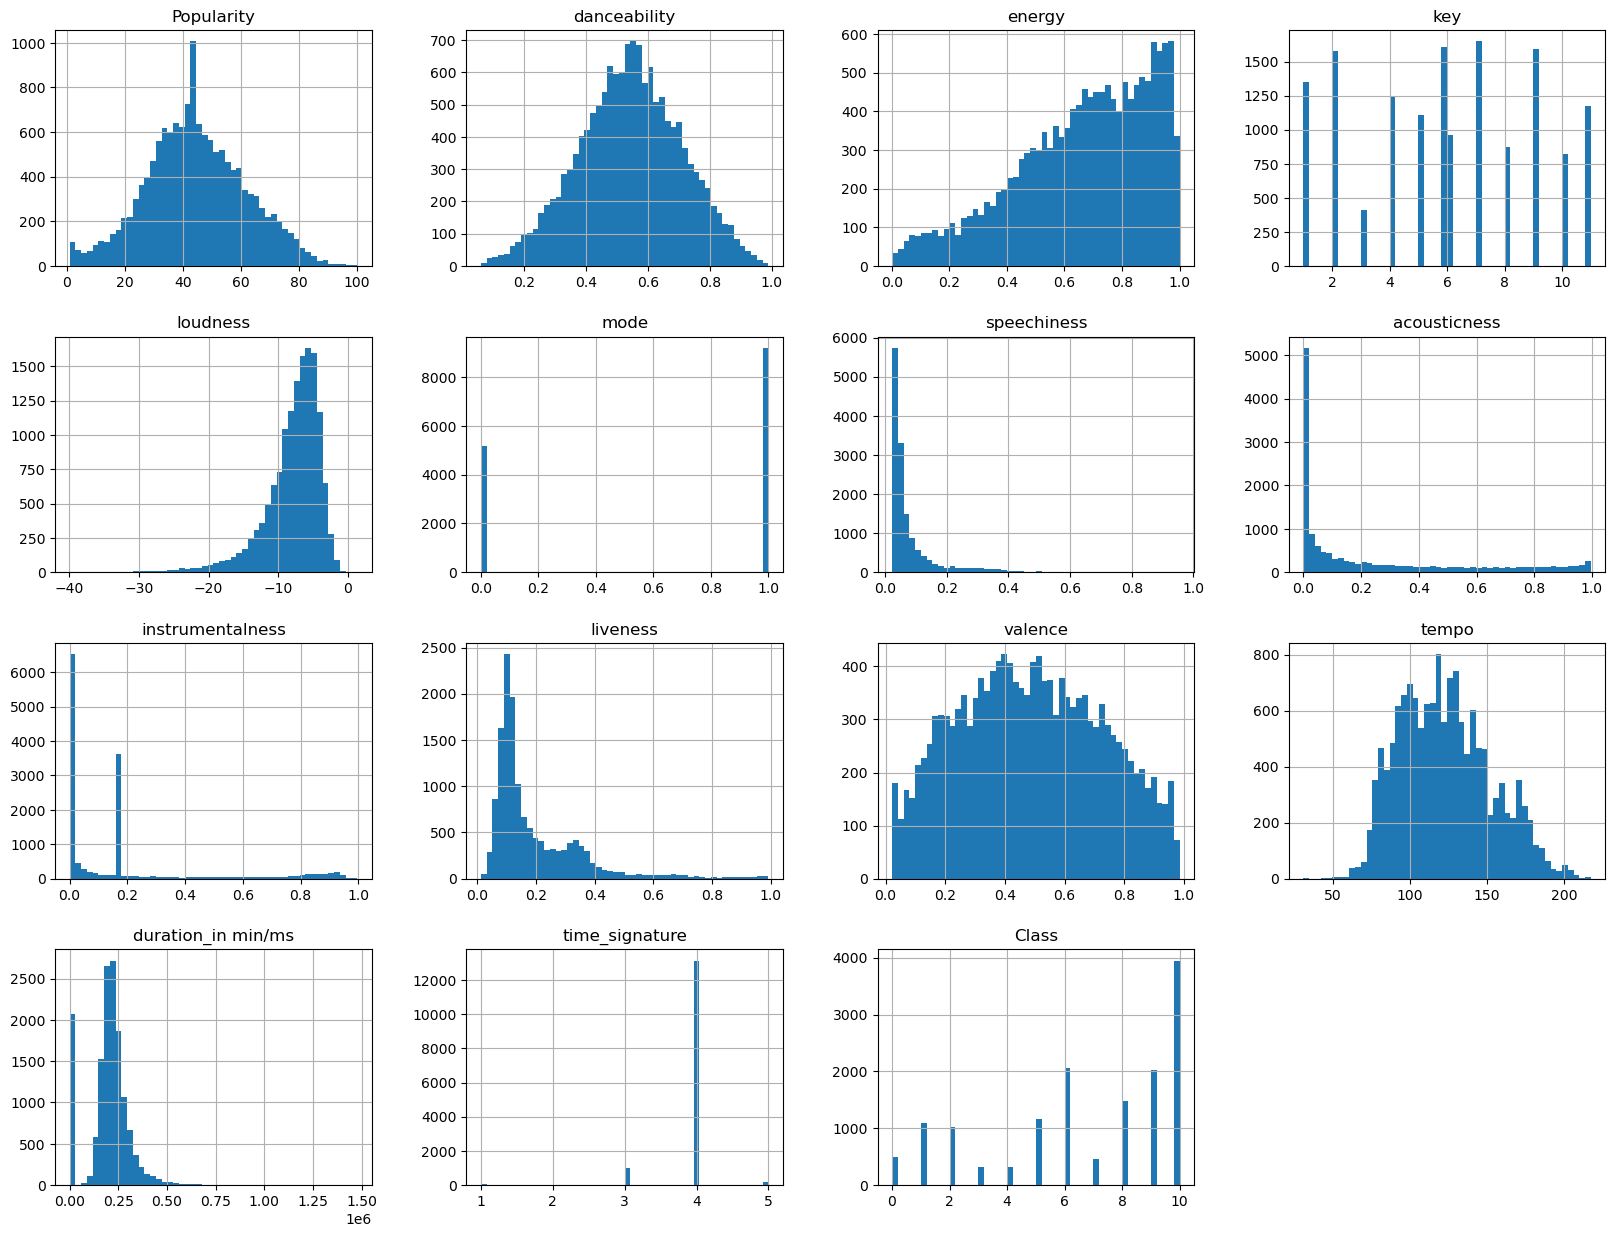

In [19]:
music.hist(figsize=(20,15),bins=50)
plt.show()

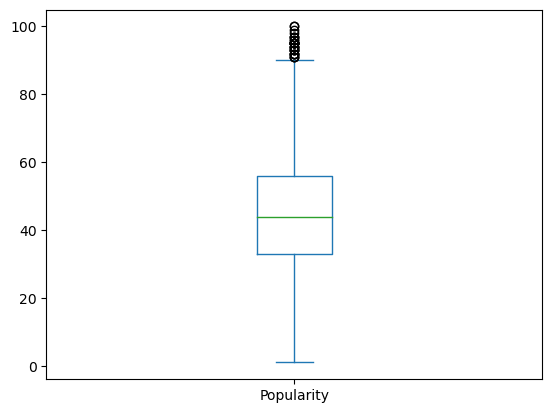

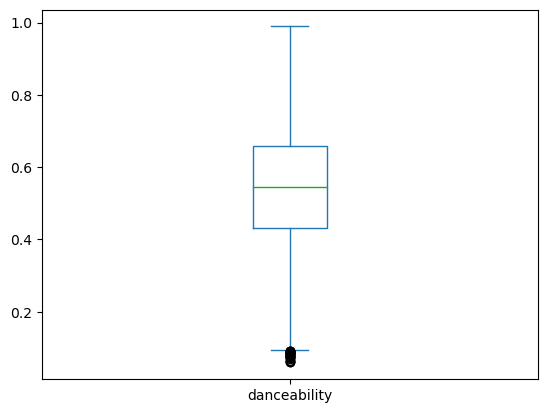

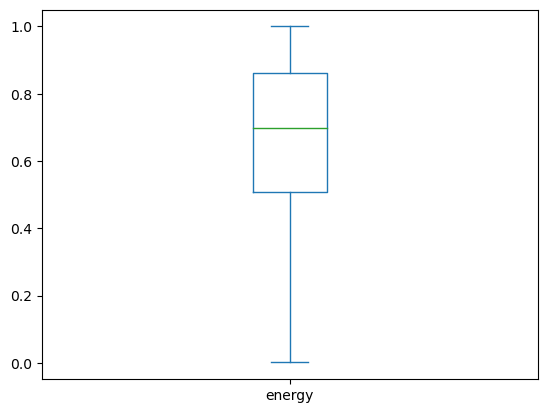

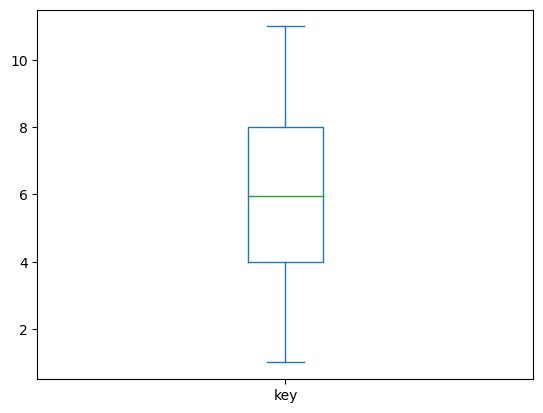

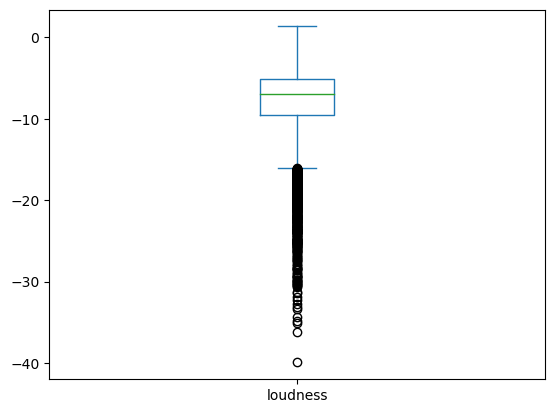

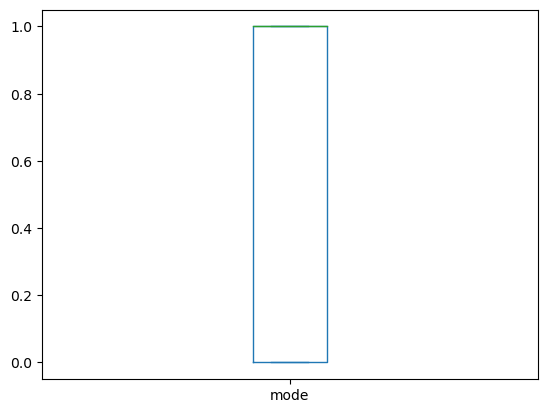

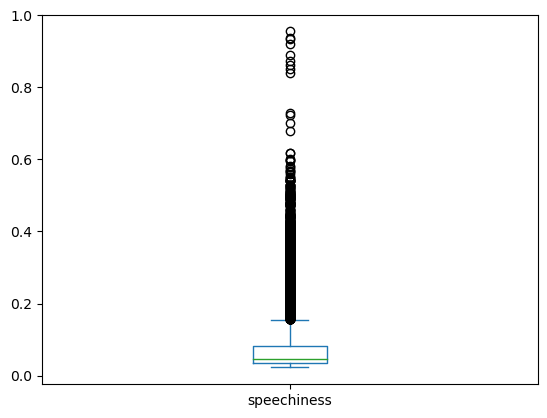

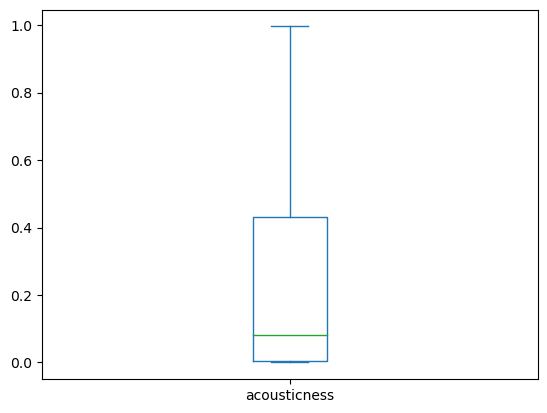

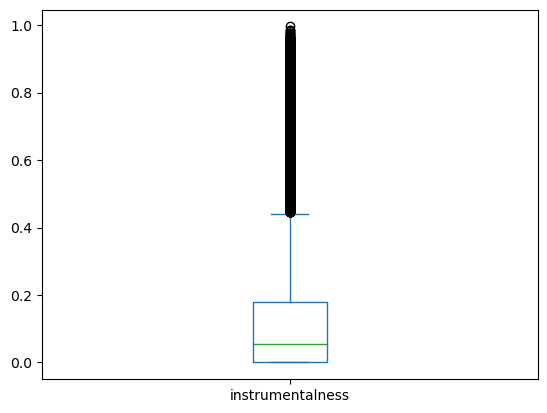

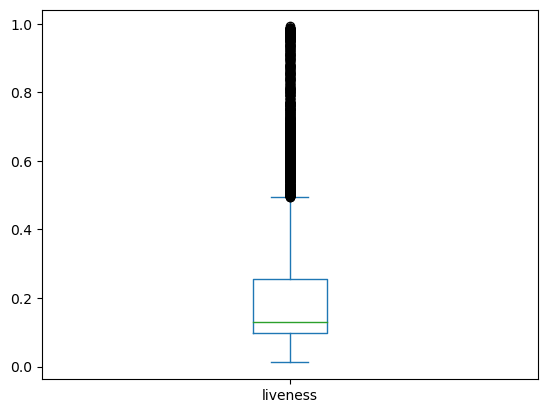

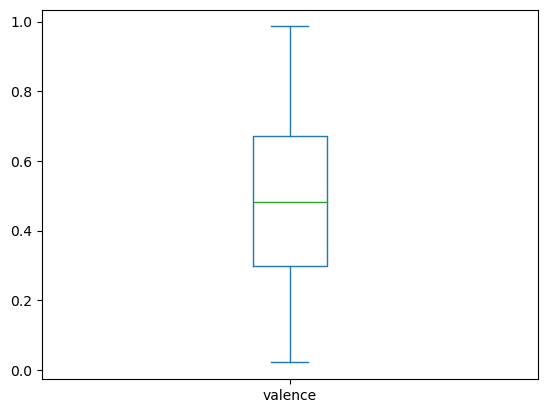

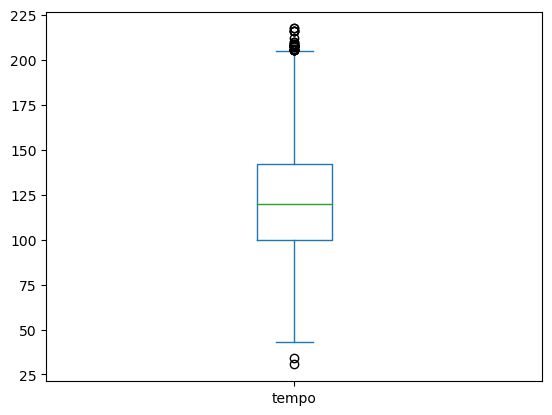

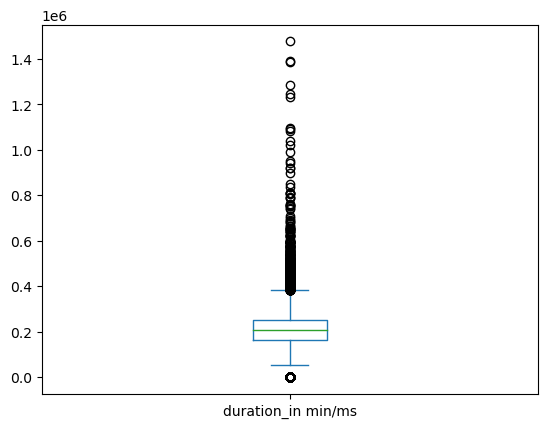

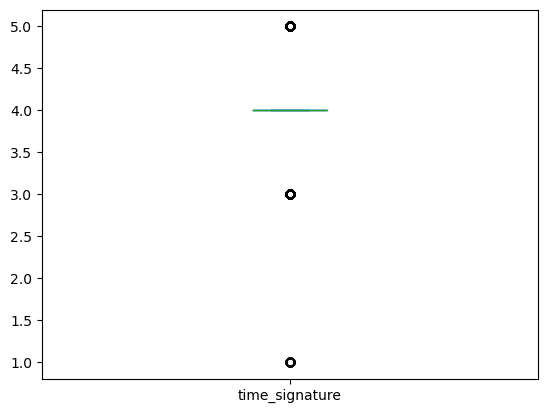

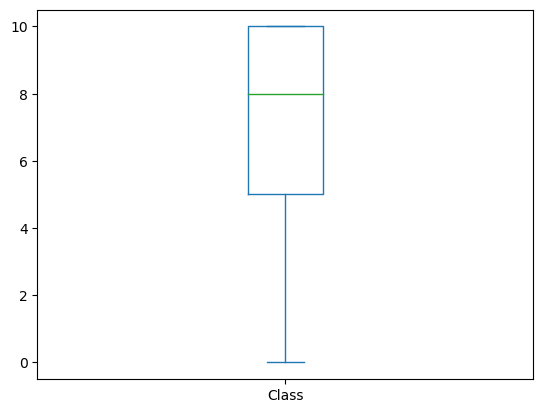

In [20]:

for col in music:
    if music[col].dtype== object :
        continue
    else :
        
    
        
    
         music[col].plot(kind='box')
         plt.show()
    
  


In [21]:
corr_matrix = music.corr()
corr_matrix['Class'].sort_values(ascending = False)

Class                 1.000000
energy                0.215961
duration_in min/ms    0.203968
loudness              0.174441
Popularity            0.156494
liveness              0.040429
time_signature        0.040184
tempo                 0.034445
key                  -0.003967
instrumentalness     -0.025330
mode                 -0.039872
speechiness          -0.062523
valence              -0.079948
danceability         -0.101109
acousticness         -0.240905
Name: Class, dtype: float64

<AxesSubplot:>

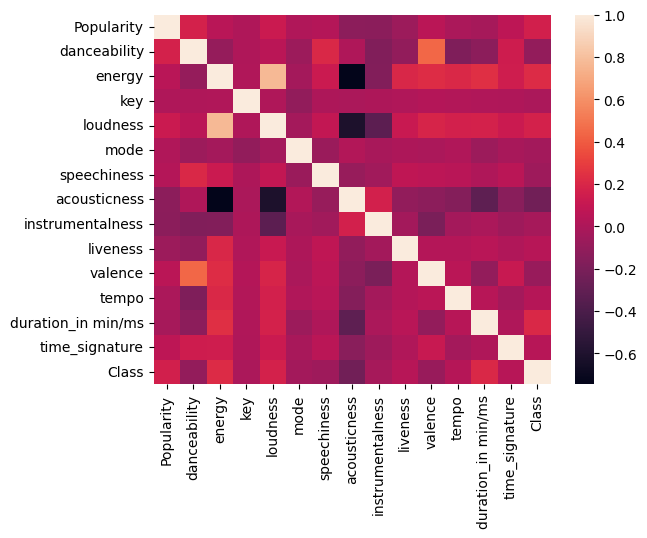

In [22]:
sns.heatmap(corr_matrix)

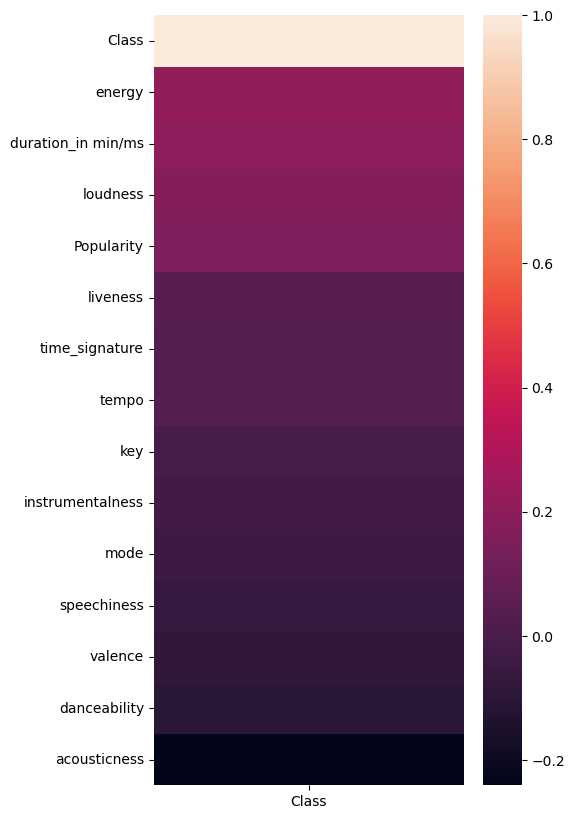

In [27]:
plt.figure(figsize=(5,10))
heatmap=sns.heatmap(music.corr()[['Class']].sort_values(ascending=False,by='Class'))

plt.show()

<AxesSubplot:>

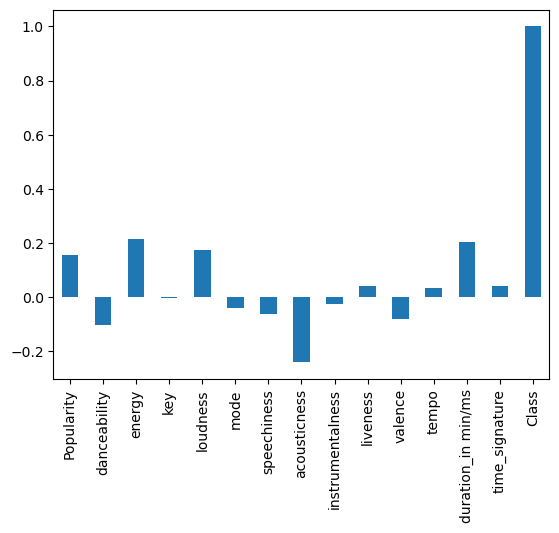

In [28]:
music.corrwith(music['Class']).plot(kind='bar')

C:\Users\Elnour Tech\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


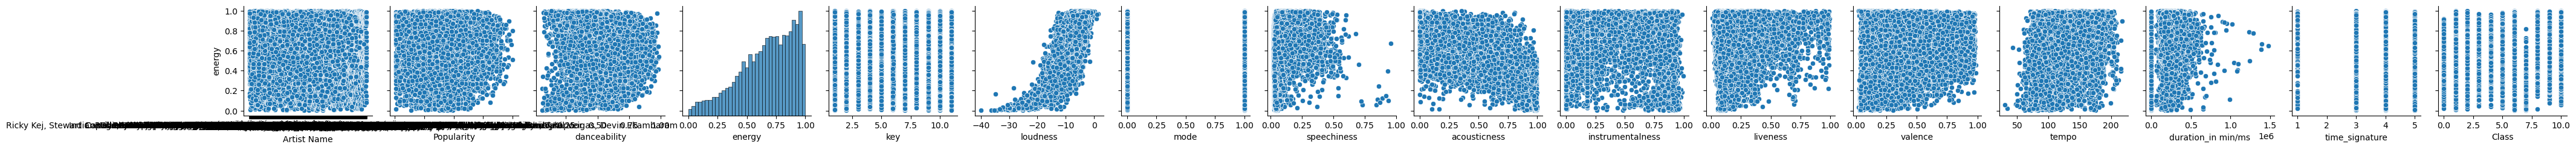

In [29]:
fig_size=(10,20)
sns.pairplot(data=music,
                  y_vars=['energy'],
                  x_vars=music)
plt.show()

C:\Users\Elnour Tech\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


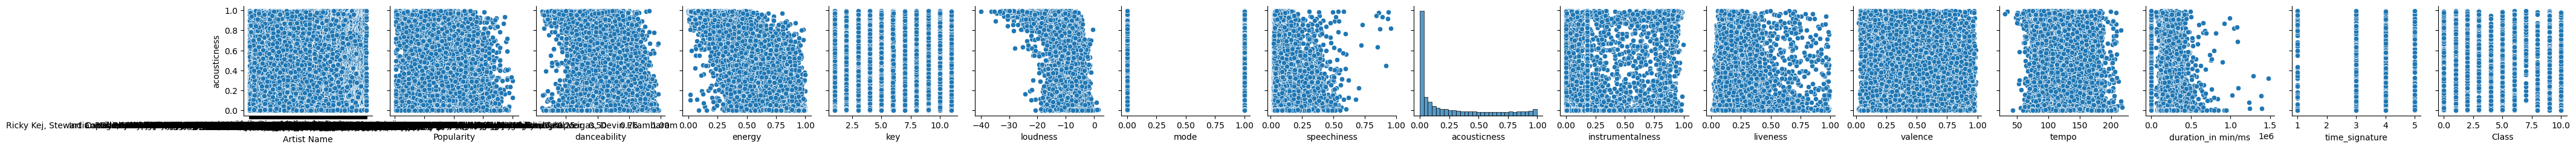

In [30]:
sns.pairplot(data=music,
                  y_vars=['acousticness'],
                  x_vars=music)
plt.show()

<AxesSubplot:xlabel='Class'>

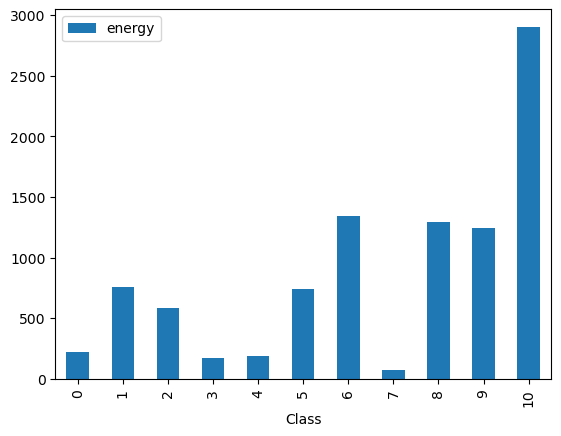

In [31]:
music.groupby(['Class']).sum().plot(
    kind='bar', y='energy')


<AxesSubplot:xlabel='Class'>

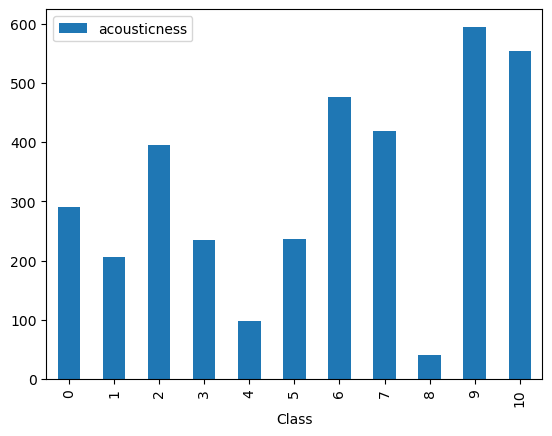

In [32]:
music.groupby(['Class']).sum().plot(
    kind='bar', y='acousticness')


<AxesSubplot:ylabel='Class'>

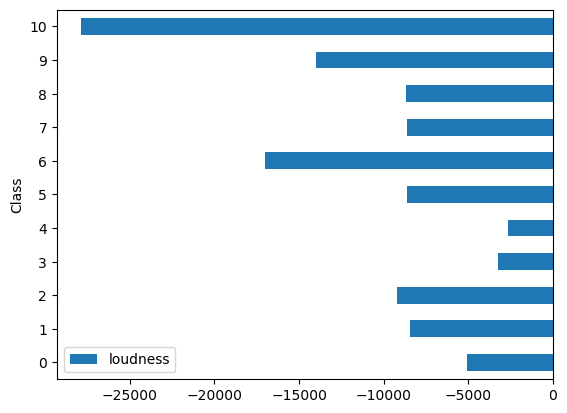

In [33]:
music.groupby(['Class']).sum().plot(kind='barh',y='loudness')

<AxesSubplot:xlabel='Class'>

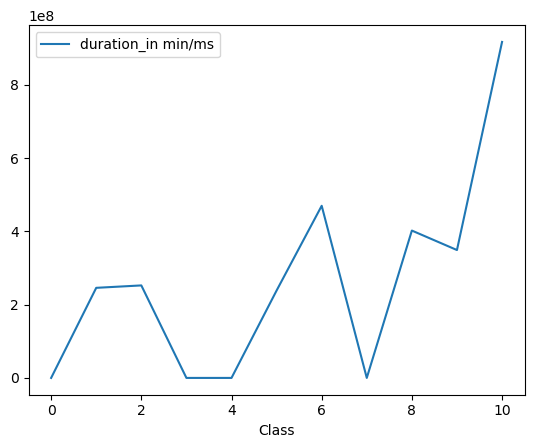

In [34]:
music.groupby(['Class']).sum().plot(y='duration_in min/ms')

In [35]:
music['Class'].value_counts()

10    3948
6     2067
9     2017
8     1480
5     1155
1     1096
2     1017
0      500
7      461
3      322
4      310
Name: Class, dtype: int64

In [36]:
from sklearn.utils import resample

In [37]:
df_0 = music[music.Class==0]
df_1 = music[music.Class==1]
df_2 = music[music.Class==2]
df_3 = music[music.Class==3]
df_4 = music[music.Class==4]
df_5 = music[music.Class==5]
df_6 = music[music.Class==6]
df_7 = music[music.Class==7]
df_8 = music[music.Class==8]
df_9 = music[music.Class==9]
df_10 = music[music.Class==10]

In [38]:
df_majority_downsampled1 = resample(df_1, 
                                 replace=False,    # sample without replacement
                                 n_samples=310,     # to match minority class
                                 random_state=123)
df_majority_downsampled8= resample(df_8, 
                                 replace=False,    # sample without replacement
                                 n_samples=310,     # to match minority class
                                 random_state=123)
df_majority_downsampled9 = resample(df_9, 
                                 replace=False,    # sample without replacement
                                 n_samples=310,     # to match minority class
                                 random_state=123)
df_majority_downsampled6 = resample(df_6, 
                                 replace=False,    # sample without replacement
                                 n_samples=310,     # to match minority class
                                 random_state=123)
df_majority_downsampled10 = resample(df_10, 
                                 replace=False,    # sample without replacement
                                 n_samples=310,     # to match minority class
                                 random_state=123)
df_majority_downsampled5 = resample(df_5, 
                                 replace=False,    # sample without replacement
                                 n_samples=310,     # to match minority class
                                 random_state=123)

df_majority_downsampled2 = resample(df_2, 
                                 replace=False,    # sample without replacement
                                 n_samples=310,     # to match minority class
                                 random_state=123)
df_majority_downsampled0 = resample(df_0, 
                                 replace=False,    # sample without replacement
                                 n_samples=310,     # to match minority class
                                 random_state=123)
df_majority_downsampled7 = resample(df_7, 
                                 replace=False,    # sample without replacement
                                 n_samples=310,     # to match minority class
                                 random_state=123)

df_majority_downsampled3 = resample(df_3, 
                                 replace=False,    # sample without replacement
                                 n_samples=310,     # to match minority class
                                 random_state=123)


In [39]:
df_downsampled = pd.concat([df_majority_downsampled1,df_majority_downsampled8,df_majority_downsampled9,df_majority_downsampled6,df_majority_downsampled10,df_majority_downsampled5,df_majority_downsampled2,df_majority_downsampled0,df_majority_downsampled7,df_majority_downsampled3,df_4])

In [40]:
df_downsampled.Class.value_counts()

1     310
8     310
9     310
6     310
10    310
5     310
2     310
0     310
7     310
3     310
4     310
Name: Class, dtype: int64

In [44]:
df_downsampled

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
6599,Rolling Blackouts Coastal Fever,31.000000,0.443,0.761,2.0,-5.338,1,0.0430,0.0399,0.000316,0.3590,0.562,123.026,263668.000000,4,1
7708,Moses Boyd,41.000000,0.415,0.790,1.0,-7.349,1,0.0515,0.0192,0.031900,0.1320,0.376,123.912,309625.000000,4,1
2821,Elder Island,46.000000,0.460,0.405,8.0,-10.547,1,0.1320,0.4870,0.717000,0.1080,0.153,92.714,239556.000000,4,1
2863,The Fratellis,56.000000,0.510,0.818,7.0,-3.205,1,0.1570,0.0439,0.178129,0.0801,0.574,154.561,202617.000000,4,1
7467,Homeschool,40.000000,0.581,0.576,1.0,-6.938,1,0.0276,0.2070,0.000017,0.1090,0.526,77.001,221760.000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13897,Vern Gosdin,36.000000,0.562,0.448,9.0,-13.113,1,0.0358,0.1890,0.178129,0.1440,0.603,132.622,2.897550,4,4
13924,Kacey Musgraves,65.000000,0.448,0.649,5.0,-5.925,1,0.0434,0.4180,0.178129,0.0976,0.575,195.925,3.327333,4,4
14208,Randy Travis,65.000000,0.647,0.482,5.0,-8.591,1,0.0262,0.2900,0.178129,0.2320,0.437,142.648,3.651333,4,4
14285,"Zac Brown Band, Jimmy Buffett",44.525208,0.715,0.584,8.0,-8.231,1,0.0296,0.4320,0.000001,0.0950,0.610,90.987,3.386217,4,4


In [45]:
music

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Marina Maximilian,37.000000,0.334,0.536,9.000000,-6.649,0,0.0381,0.378000,0.178129,0.1060,0.235,152.429,204947.000000,4,9
1,The Black Keys,67.000000,0.725,0.747,11.000000,-5.545,1,0.0876,0.027200,0.046800,0.1040,0.380,132.921,191956.000000,4,6
2,Royal & the Serpent,44.525208,0.584,0.804,7.000000,-6.094,1,0.0619,0.000968,0.635000,0.2840,0.635,159.953,161037.000000,4,10
3,Detroit Blues Band,12.000000,0.515,0.308,5.953781,-14.711,1,0.0312,0.907000,0.021300,0.3000,0.501,172.472,298093.000000,3,2
4,Coast Contra,48.000000,0.565,0.777,6.000000,-5.096,0,0.2490,0.183000,0.178129,0.2110,0.619,88.311,254145.000000,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,NOISY,47.000000,0.607,0.946,1.000000,-2.965,1,0.1500,0.005480,0.000390,0.2780,0.653,120.011,195181.000000,4,10
14392,BLOODSPOT,27.000000,0.435,0.951,8.000000,-7.475,1,0.0576,0.000005,0.550000,0.0952,0.203,135.034,282043.000000,4,8
14393,Cold Years,22.000000,0.415,0.941,11.000000,-4.300,1,0.0524,0.001810,0.000004,0.3370,0.572,167.978,176529.000000,4,10
14394,The Jaded Hearts Club,37.000000,0.493,0.986,1.000000,-2.279,1,0.0917,0.000967,0.006620,0.1230,0.567,122.036,186307.000000,4,10


In [50]:
from sklearn.preprocessing import LabelEncoder
hot=LabelEncoder()

In [52]:
Labeled_Artist_Name=hot.fit_transform(df_downsampled['Artist Name'])

In [53]:
df_downsampled['Labeled_Artist_Name']=Labeled_Artist_Name

In [54]:
df_downsampled

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Labeled_Artist_Name
6599,Rolling Blackouts Coastal Fever,31.000000,0.443,0.761,2.0,-5.338,1,0.0430,0.0399,0.000316,0.3590,0.562,123.026,263668.000000,4,1,1977
7708,Moses Boyd,41.000000,0.415,0.790,1.0,-7.349,1,0.0515,0.0192,0.031900,0.1320,0.376,123.912,309625.000000,4,1,1656
2821,Elder Island,46.000000,0.460,0.405,8.0,-10.547,1,0.1320,0.4870,0.717000,0.1080,0.153,92.714,239556.000000,4,1,698
2863,The Fratellis,56.000000,0.510,0.818,7.0,-3.205,1,0.1570,0.0439,0.178129,0.0801,0.574,154.561,202617.000000,4,1,2334
7467,Homeschool,40.000000,0.581,0.576,1.0,-6.938,1,0.0276,0.2070,0.000017,0.1090,0.526,77.001,221760.000000,4,1,992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13897,Vern Gosdin,36.000000,0.562,0.448,9.0,-13.113,1,0.0358,0.1890,0.178129,0.1440,0.603,132.622,2.897550,4,4,2526
13924,Kacey Musgraves,65.000000,0.448,0.649,5.0,-5.925,1,0.0434,0.4180,0.178129,0.0976,0.575,195.925,3.327333,4,4,1234
14208,Randy Travis,65.000000,0.647,0.482,5.0,-8.591,1,0.0262,0.2900,0.178129,0.2320,0.437,142.648,3.651333,4,4,1918
14285,"Zac Brown Band, Jimmy Buffett",44.525208,0.715,0.584,8.0,-8.231,1,0.0296,0.4320,0.000001,0.0950,0.610,90.987,3.386217,4,4,2647


In [58]:
df_downsampled.drop(['Artist Name'],axis=1,inplace=True)

In [59]:

train_set, test_set = train_test_split(df_downsampled, test_size=0.2,
random_state=42)
yt= train_set.Class
xt = train_set.drop('Class', axis=1)
 

In [60]:
xt

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Labeled_Artist_Name
12353,56.0,0.462,0.0298,5.953781,-25.490,1,0.0381,0.974000,0.930000,0.1070,0.0877,90.083,3.289200,4,2360
399,64.0,0.642,0.5230,3.000000,-8.579,1,0.1100,0.772000,0.000003,0.5270,0.6540,101.635,185627.000000,4,738
7244,39.0,0.785,0.1470,6.000000,-11.382,1,0.1250,0.938000,0.001590,0.0864,0.2610,100.824,158800.000000,4,1966
9047,54.0,0.706,0.3290,5.953781,-10.070,1,0.0286,0.734000,0.011500,0.1020,0.2320,130.030,3.640450,4,1370
188,26.0,0.454,0.3810,5.953781,-13.133,0,0.0499,0.302000,0.000080,0.2890,0.3150,75.058,4.533333,4,1672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,32.0,0.539,0.9960,6.000000,-2.570,1,0.0405,0.000895,0.910000,0.3310,0.6560,130.010,265837.000000,4,1035
2298,47.0,0.554,0.6060,7.000000,-5.740,1,0.0256,0.152000,0.000008,0.2820,0.5990,93.991,220768.000000,4,1867
11635,56.0,0.180,0.8610,5.953781,-3.935,0,0.0727,0.000026,0.425000,0.6440,0.1010,128.165,317281.000000,4,592
12616,41.0,0.555,0.4630,4.000000,-7.994,1,0.0343,0.612000,0.178129,0.1420,0.6610,88.399,174053.000000,4,357


In [67]:
xs=test_set.drop('Class',axis=1)
ys=test_set.Class

In [62]:



from sklearn.preprocessing import StandardScaler

In [63]:
from sklearn.compose import ColumnTransformer


num_col=list(xt.select_dtypes(include=['float', 'int' ]).columns)

In [64]:
from sklearn.pipeline import Pipeline
num_pipeline=Pipeline([("standardize", StandardScaler()),])


In [65]:
full_pipeline=ColumnTransformer([
 ("num", num_pipeline, num_col),
 ])

In [66]:
full_pipeline.fit(xt)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardize',
                                                  StandardScaler())]),
                                 ['Popularity', 'danceability', 'energy', 'key',
                                  'loudness', 'mode', 'speechiness',
                                  'acousticness', 'instrumentalness',
                                  'liveness', 'valence', 'tempo',
                                  'duration_in min/ms', 'time_signature',
                                  'Labeled_Artist_Name'])])

In [68]:
xt=full_pipeline.transform(xt)
xs=full_pipeline.transform(xs)

In [69]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [70]:
forest_clf.fit(xt,yt)
prex=forest_clf.predict(xt)

In [71]:
print(classification_report(prex, yt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       0.97      0.98      0.98       228
           2       1.00      1.00      1.00       256
           3       1.00      1.00      1.00       247
           4       1.00      1.00      1.00       247
           5       1.00      1.00      1.00       250
           6       0.98      0.98      0.98       249
           7       1.00      1.00      1.00       249
           8       1.00      1.00      1.00       237
           9       0.99      0.99      0.99       249
          10       0.98      0.98      0.98       262

    accuracy                           0.99      2728
   macro avg       0.99      0.99      0.99      2728
weighted avg       0.99      0.99      0.99      2728



In [72]:
prexs=forest_clf.predict(xs)
print(classification_report(prexs, ys))

              precision    recall  f1-score   support

           0       0.86      0.64      0.73        75
           1       0.15      0.26      0.19        47
           2       0.61      0.53      0.57        62
           3       0.76      0.92      0.83        52
           4       0.78      0.78      0.78        63
           5       0.84      0.69      0.76        74
           6       0.28      0.32      0.30        53
           7       0.95      0.98      0.97        59
           8       0.75      0.66      0.71        83
           9       0.40      0.45      0.42        56
          10       0.35      0.29      0.32        58

    accuracy                           0.61       682
   macro avg       0.61      0.59      0.60       682
weighted avg       0.64      0.61      0.62       682



In [73]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

In [74]:
sgd_clf.fit(xt,yt)

SGDClassifier(random_state=42)

In [75]:
sgd_predictions=sgd_clf.predict(xt)

In [76]:
f1_score(yt, sgd_predictions,average='micro')

0.4908357771260997

In [77]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [78]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(xt,yt)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=150)


In [82]:
model_grid = RandomForestClassifier(max_depth=9,
                                    max_features="log2",
                                    max_leaf_nodes=9,
                                    n_estimators=25)
model_grid.fit(xt, yt)
y_pred_grid = model_grid.predict(xt)
print(classification_report(y_pred_grid, yt))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65       235
           1       0.00      0.00      0.00         0
           2       0.74      0.43      0.55       439
           3       0.72      0.67      0.69       267
           4       0.83      0.66      0.74       307
           5       0.86      0.58      0.69       370
           6       0.09      0.31      0.14        74
           7       0.89      0.83      0.86       268
           8       0.82      0.45      0.58       438
           9       0.08      0.53      0.13        36
          10       0.28      0.25      0.26       294

    accuracy                           0.54      2728
   macro avg       0.54      0.49      0.48      2728
weighted avg       0.71      0.54      0.60      2728



C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
prexg=model_grid.predict(xs)
print(classification_report(prexg, ys))

              precision    recall  f1-score   support

           0       0.62      0.54      0.58        65
           1       0.00      0.00      0.00         0
           2       0.69      0.37      0.48       100
           3       0.63      0.67      0.65        60
           4       0.81      0.69      0.74        74
           5       0.85      0.60      0.70        87
           6       0.15      0.36      0.21        25
           7       0.84      0.88      0.86        58
           8       0.81      0.52      0.63       113
           9       0.06      0.27      0.10        15
          10       0.35      0.20      0.25        85

    accuracy                           0.52       682
   macro avg       0.53      0.46      0.47       682
weighted avg       0.67      0.52      0.57       682



C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(xt,yt)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='sqrt', max_leaf_nodes=9)


In [83]:
model_random = RandomForestClassifier(max_depth=3,
                                      max_features='log2',
                                      max_leaf_nodes=6,
                                      n_estimators=100)
model_random.fit(xt, yt)
y_pred_rand = model_random.predict(xt)
print(classification_report(y_pred_rand, yt))

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       187
           1       0.00      0.00      0.00         0
           2       0.74      0.39      0.51       489
           3       0.79      0.72      0.75       269
           4       0.84      0.64      0.73       323
           5       0.86      0.58      0.69       370
           6       0.06      0.28      0.10        57
           7       0.92      0.76      0.83       303
           8       0.78      0.43      0.55       436
           9       0.05      0.46      0.09        28
          10       0.29      0.28      0.28       266

    accuracy                           0.54      2728
   macro avg       0.53      0.48      0.47      2728
weighted avg       0.72      0.54      0.60      2728



C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
prexr=model_random.predict(xs)
print(classification_report(prexr, ys))

              precision    recall  f1-score   support

           0       0.52      0.66      0.58        44
           1       0.00      0.00      0.00         0
           2       0.74      0.35      0.48       113
           3       0.70      0.77      0.73        57
           4       0.84      0.62      0.71        86
           5       0.84      0.58      0.68        88
           6       0.10      0.35      0.15        17
           7       0.93      0.81      0.87        70
           8       0.77      0.46      0.58       121
           9       0.08      0.56      0.14         9
          10       0.33      0.21      0.25        77

    accuracy                           0.52       682
   macro avg       0.53      0.49      0.47       682
weighted avg       0.70      0.52      0.58       682



C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
test=pd.read_csv('music test.csv')

In [107]:
test

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
3,14400,WALK THE MOON,Different Colors,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,17992,Within Temptation,Stand My Ground,55.0,0.271,0.866,5.0,-4.072,0,0.0578,0.048900,0.000762,0.1160,0.127,175.665,267987.0,4
3596,17993,Dikla,◊©◊ë◊ï◊¢◊ô◊ô◊ù,38.0,0.598,0.690,5.0,-4.758,0,0.3030,0.363000,NaN,0.0519,0.653,187.934,198300.0,4
3597,17994,Cut Copy,Hearts On Fire - Calvin Harris Remix,18.0,0.783,0.820,1.0,-6.102,1,0.0489,0.000540,0.499000,0.0628,0.235,129.015,339213.0,4
3598,17995,Jethro Tull,Thick as a Brick - Edit #1,38.0,0.443,0.401,5.0,-13.997,1,0.0426,0.263000,NaN,0.1680,0.751,168.209,182587.0,3


In [108]:
test.drop(['Id','Artist Name','Track Name'],axis=1,inplace=True)

In [109]:
test.isna().sum()

Popularity             95
danceability            0
energy                  0
key                   405
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      836
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

In [110]:
key_mean1=test['key'].mean()
test['key'].fillna(value=key_mean1,inplace=True)

In [111]:
ins_mean1=test['instrumentalness'].mean()
test['instrumentalness'].fillna(value=ins_mean1,inplace=True)

In [112]:
pop_mean1=test['Popularity'].mean()
test['Popularity'].fillna(value=pop_mean1,inplace=True)

In [113]:
test.isna().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

In [114]:
test=scaler.fit_transform(test)

In [116]:
test_pre=rffinal_model.predict(test)

In [117]:
test2=pd.read_csv('music test.csv')

In [118]:
sub4=test2[['Id']]
sub4

,Id
0,14397
1,14398
2,14399
3,14400
4,14401
...,...
3595,17992
3596,17993
3597,17994
3598,17995


In [119]:
sub4['Class']=test_pre

C:\Users\Elnour Tech\AppData\Local\Temp\ipykernel_12760\1874115031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub4['Class']=test_pre


In [120]:
sub4.to_csv('sub4.csv',index=None)

In [121]:
pd.read_csv('sub4.csv')

,Id,Class
0,14397,9
1,14398,6
2,14399,9
3,14400,1
4,14401,5
...,...,...
3595,17992,10
3596,17993,5
3597,17994,6
3598,17995,2


In [86]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [87]:
knn_clf= KNeighborsClassifier()

In [88]:
final_model = VotingClassifier(
    estimators=[("rf", forest_clf), ("sgd", sgd_clf), ("knn", knn_clf)],
    voting="hard",
)

In [89]:
final_model.fit(xt,yt)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('sgd', SGDClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier())])

In [91]:
fpre=final_model.predict(xt)
print(classification_report(fpre, yt))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79       316
           1       0.82      0.43      0.57       440
           2       0.76      0.78      0.77       248
           3       0.89      0.92      0.90       240
           4       0.83      0.88      0.85       233
           5       0.88      0.81      0.84       269
           6       0.55      0.82      0.66       168
           7       0.94      0.94      0.94       247
           8       0.87      0.78      0.82       265
           9       0.57      0.84      0.68       170
          10       0.46      0.91      0.61       132

    accuracy                           0.77      2728
   macro avg       0.77      0.80      0.77      2728
weighted avg       0.80      0.77      0.76      2728



C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [92]:
fprs=final_model.predict(xs)
print(classification_report(fprs, ys))

              precision    recall  f1-score   support

           0       0.75      0.54      0.63        78
           1       0.32      0.21      0.26       117
           2       0.56      0.57      0.56        53
           3       0.75      0.85      0.80        55
           4       0.71      0.80      0.76        56
           5       0.82      0.69      0.75        72
           6       0.13      0.26      0.17        31
           7       0.93      0.93      0.93        61
           8       0.73      0.61      0.66        87
           9       0.35      0.48      0.41        46
          10       0.10      0.19      0.13        26

    accuracy                           0.56       682
   macro avg       0.56      0.56      0.55       682
weighted avg       0.60      0.56      0.57       682



C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [93]:
from sklearn.ensemble import BaggingClassifier

In [94]:
from sklearn.linear_model import LogisticRegression
seed=40

In [95]:
clf = BaggingClassifier(
    LogisticRegression(random_state=seed, max_iter=2000),
    n_estimators=20,
    random_state=seed,
)


In [96]:
clf.fit(xt,yt)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=2000,
                                                    random_state=40),
                  n_estimators=20, random_state=40)

In [98]:
bpre=clf.predict(xt)

print(classification_report(bpre, yt))

              precision    recall  f1-score   support

           0       0.66      0.63      0.65       266
           1       0.06      0.33      0.10        40
           2       0.70      0.53      0.60       333
           3       0.77      0.77      0.77       248
           4       0.77      0.68      0.72       280
           5       0.74      0.72      0.73       254
           6       0.26      0.36      0.30       179
           7       0.92      0.91      0.91       250
           8       0.74      0.54      0.62       324
           9       0.33      0.33      0.33       252
          10       0.38      0.33      0.35       302

    accuracy                           0.58      2728
   macro avg       0.57      0.56      0.55      2728
weighted avg       0.63      0.58      0.60      2728



In [99]:
bprs=clf.predict(xs)

print(classification_report(bprs, ys))

              precision    recall  f1-score   support

           0       0.66      0.60      0.63        62
           1       0.06      0.33      0.11        15
           2       0.63      0.49      0.55        70
           3       0.71      0.79      0.75        57
           4       0.76      0.77      0.77        62
           5       0.72      0.67      0.69        66
           6       0.20      0.29      0.24        41
           7       0.93      0.85      0.89        67
           8       0.71      0.55      0.62        95
           9       0.44      0.36      0.40        74
          10       0.35      0.23      0.28        73

    accuracy                           0.55       682
   macro avg       0.56      0.54      0.54       682
weighted avg       0.61      0.55      0.58       682



In [100]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [101]:
model_5 = AdaBoostClassifier(random_state=seed)
model_2 = LogisticRegression(random_state=seed, max_iter=1000)
model_3 = SGDClassifier(random_state=seed)

In [102]:
estimators = [("rf", forest_clf), ("lr",model_2 ), ("ada", model_5)]

In [103]:
final_estimator = GradientBoostingClassifier(random_state=seed)


In [104]:
sclf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [105]:
sclf.fit(xt,yt)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('lr',
                                LogisticRegression(max_iter=1000,
                                                   random_state=40)),
                               ('ada', AdaBoostClassifier(random_state=40))],
                   final_estimator=GradientBoostingClassifier(random_state=40))

In [107]:
spre=clf.predict(xt)

print(classification_report(spre, yt))

              precision    recall  f1-score   support

           0       0.66      0.63      0.65       266
           1       0.06      0.33      0.10        40
           2       0.70      0.53      0.60       333
           3       0.77      0.77      0.77       248
           4       0.77      0.68      0.72       280
           5       0.74      0.72      0.73       254
           6       0.26      0.36      0.30       179
           7       0.92      0.91      0.91       250
           8       0.74      0.54      0.62       324
           9       0.33      0.33      0.33       252
          10       0.38      0.33      0.35       302

    accuracy                           0.58      2728
   macro avg       0.57      0.56      0.55      2728
weighted avg       0.63      0.58      0.60      2728



In [108]:
spres=clf.predict(xs)

print(classification_report(spres, ys))

              precision    recall  f1-score   support

           0       0.66      0.60      0.63        62
           1       0.06      0.33      0.11        15
           2       0.63      0.49      0.55        70
           3       0.71      0.79      0.75        57
           4       0.76      0.77      0.77        62
           5       0.72      0.67      0.69        66
           6       0.20      0.29      0.24        41
           7       0.93      0.85      0.89        67
           8       0.71      0.55      0.62        95
           9       0.44      0.36      0.40        74
          10       0.35      0.23      0.28        73

    accuracy                           0.55       682
   macro avg       0.56      0.54      0.54       682
weighted avg       0.61      0.55      0.58       682



In [109]:
aclf = AdaBoostClassifier(random_state=seed)

In [110]:
aclf.fit(xt,yt)

AdaBoostClassifier(random_state=40)

In [111]:
apre=aclf.predict(xt)


print(classification_report(apre, yt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.03      0.27      0.05        22
           2       0.12      0.45      0.19        66
           3       0.01      0.38      0.02         8
           4       0.00      0.00      0.00         0
           5       0.27      0.59      0.37       115
           6       0.47      0.16      0.23       746
           7       0.38      0.73      0.50       129
           8       0.67      0.45      0.53       355
           9       0.17      0.04      0.07       923
          10       0.35      0.25      0.29       364

    accuracy                           0.22      2728
   macro avg       0.22      0.30      0.21      2728
weighted avg       0.35      0.22      0.24      2728



C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Elnour Tech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

In [113]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [114]:
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=forest_clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(xt, yt)

In [115]:
rffinal_model = grid_search.best_estimator_ 

In [116]:
rfpre=rffinal_model.predict(xt)


print(classification_report(rfpre, yt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       0.96      0.99      0.98       224
           2       1.00      1.00      1.00       256
           3       1.00      1.00      1.00       247
           4       1.00      1.00      1.00       247
           5       1.00      1.00      1.00       250
           6       0.99      0.98      0.98       253
           7       1.00      1.00      1.00       249
           8       1.00      1.00      1.00       237
           9       0.99      0.99      0.99       247
          10       0.99      0.98      0.98       264

    accuracy                           0.99      2728
   macro avg       0.99      0.99      0.99      2728
weighted avg       0.99      0.99      0.99      2728



In [117]:
rfpres=rffinal_model.predict(xs)


print(classification_report(rfpres, ys))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70        67
           1       0.10      0.21      0.14        38
           2       0.72      0.56      0.63        70
           3       0.75      0.87      0.80        54
           4       0.79      0.76      0.78        66
           5       0.79      0.67      0.72        72
           6       0.26      0.29      0.28        55
           7       0.97      0.95      0.96        62
           8       0.75      0.67      0.71        82
           9       0.44      0.48      0.46        56
          10       0.39      0.32      0.35        60

    accuracy                           0.60       682
   macro avg       0.61      0.58      0.59       682
weighted avg       0.64      0.60      0.62       682



In [118]:
logmodel = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logmodel, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(xt, yt)
lfinal_model = grid_search.best_estimator_ 

In [119]:
lpre=lfinal_model.predict(xt)

In [120]:
print(classification_report(yt,lpre))

              precision    recall  f1-score   support

           0       0.64      0.63      0.64       254
           1       0.35      0.04      0.07       231
           2       0.49      0.71      0.58       256
           3       0.75      0.77      0.76       247
           4       0.69      0.79      0.73       247
           5       0.69      0.80      0.74       249
           6       0.38      0.23      0.29       249
           7       0.91      0.92      0.91       249
           8       0.51      0.73      0.60       237
           9       0.30      0.29      0.29       248
          10       0.33      0.35      0.34       261

    accuracy                           0.57      2728
   macro avg       0.55      0.57      0.54      2728
weighted avg       0.55      0.57      0.54      2728

